# Khai báo các thư viện cần thiết

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets, svm, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import os
import cv2
from PIL import Image, ImageOps
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models.feature_extraction import get_graph_node_names
from sklearn.metrics import confusion_matrix, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import os
import time
import PIL
from tempfile import TemporaryDirectory
import random
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
import tensorflow.keras as kr
from numpy import mean
from numpy import std

In [ ]:
drive.mount('/content/drive')
test_folder = '/content/drive/MyDrive/CS114/Handwritten_Digits_Recognizition/class_dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hàm tiền xử lý dữ liệu (Preprocessing)

Có chuyển ảnh màu về ảnh gray scale

In [ ]:
#Return array contain pixel of image after applying greyscale, threshold and resize
def pre_processing (img):
  # Convert raw image to greyscale image,convert between RGB/BGR and grayscale, color conversions
  image = cv2.cvtColor (img,cv2.COLOR_RGB2GRAY)
  # Apply threshhode to image
  # Apply Guassian's filtering
  blur = cv2.GaussianBlur(image,(9,9),0)
  # Otsu's thresholding
  im,thre = cv2.threshold (blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  #Resize image into 28x28 pixel image
  image = cv2.resize (thre,(28,28), interpolation = cv2.INTER_AREA)
  return image

Không chuyển ảnh màu về ảnh gray scale

In [ ]:
#Return array contain pixel of image after applying greyscale, threshold and resize
def pre_processing_without_grayscale(img):
  #Resize image into 28x28 pixel image
  image = cv2.resize (img,(28,28), interpolation = cv2.INTER_AREA)
  return image

# Load dữ liệu từ Google Drive của nhóm

Xử lý dữ liệu đầu vào có đưa ảnh màu về ảnh gray scale

In [ ]:
#Load Data from Dataset stored in Google Drive of Nopen Group
data_img = []
target_img = []
count = 0
for dir1 in os.listdir(os.path.join(test_folder)):
    for file in os.listdir(os.path.join(test_folder,dir1)):
      for file_2 in os.listdir(os.path.join(test_folder,dir1,file)):
        #Get the path and label of image
        image_path= os.path.join(test_folder,dir1,file,file_2)
        image_label = file
        image = cv2.imread(image_path)
        #Preprocess data
        image = pre_processing(image)
        #Store data into array
        data_img.append(image)
        target_img.append(int(image_label))

Xử lý dữ liệu đầu vào không đưa ảnh màu về ảnh gray scale

In [ ]:
#Load Data from Dataset stored in Google Drive of Nopen Group
data_img = []
target_img = []
count = 0
for dir1 in os.listdir(os.path.join(test_folder)):
    for file in os.listdir(os.path.join(test_folder,dir1)):
      for file_2 in os.listdir(os.path.join(test_folder,dir1,file)):
        #Get the path and label of image
        image_path= os.path.join(test_folder,dir1,file,file_2)
        image_label = file
        image = cv2.imread(image_path)
        #Preprocess data
        image = pre_processing_without_grayscale(image)
        #Store data into array
        data_img.append(image)
        target_img.append(int(image_label))

# Biểu diễn dữ liệu

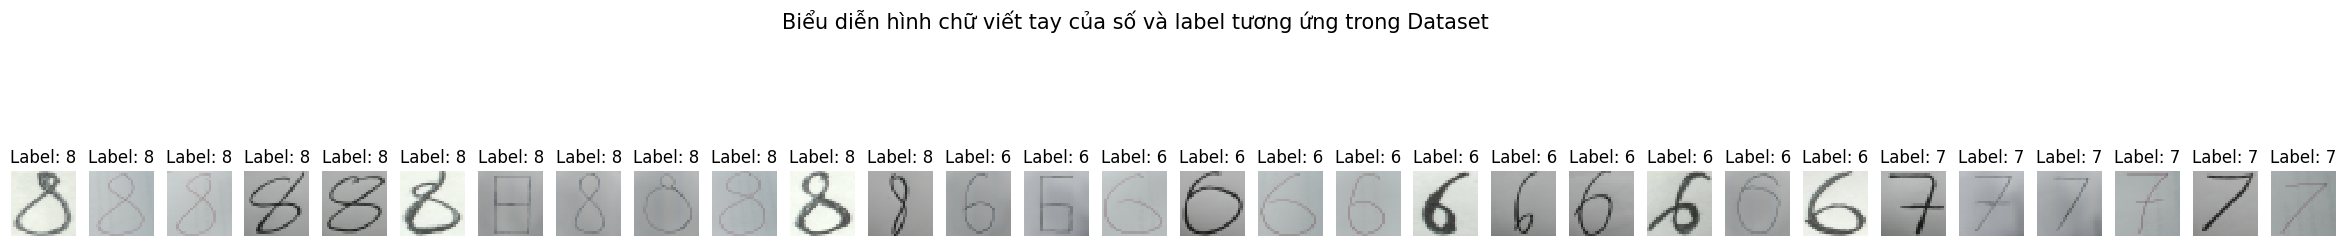

In [ ]:
#Visualize data
_, axes = plt.subplots(nrows=1, ncols=30, figsize=(30, 4))

for ax, image, label in zip(axes, data_img, target_img):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

_.suptitle("Biểu diễn hình chữ viết tay của số và label tương ứng trong Dataset", fontsize=15)
plt.show()

In [ ]:
print("Tổng số lượng dữ liệu trong tập Dataset: ",len(data_img))

Tổng số lượng dữ liệu trong tập Dataset:  1513


# Thực hiện phân chia tập dữ liệu thành tập Train và tập Test

In [ ]:
#size of test set = 20% size of dataset
X_train, X_test, y_train, y_test = train_test_split(data_img, target_img, test_size=0.2, shuffle=True, random_state=42)

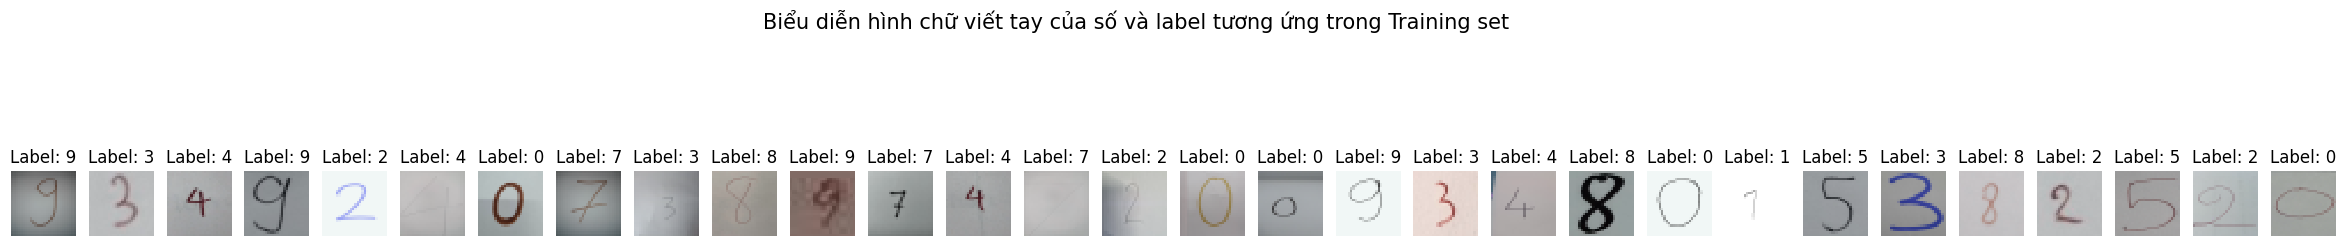

In [ ]:
#Visualize data
_, axes = plt.subplots(nrows=1, ncols=30, figsize=(30, 4))

for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

_.suptitle("Biểu diễn hình chữ viết tay của số và label tương ứng trong Training set", fontsize=15)
plt.show()

# Xử lý tập train và test trước khi train model

In [ ]:
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
# if using pre_processing_without_grayscale() --> X_train_ = X_train.reshape((X_train.shape[0], 28, 28, 3))
# else using X_train_ = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train_ = X_train.reshape((X_train.shape[0], 28, 28, 3))
# if using pre_processing_without_grayscale() --> X_test_ = X_test.reshape((X_test.shape[0], 28, 28, 3))
# else using X_test_ = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_test_ = X_test.reshape((X_test.shape[0], 28, 28, 3))

In [ ]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
y_train_ = kr.utils.to_categorical(y_train)
y_test_ = kr.utils.to_categorical(y_test)

In [ ]:
X_train_.shape

(1210, 28, 28, 3)

In [ ]:
y_train_.shape

(1210, 10)

In [ ]:
#Normalize to range 0-1
X_train_ = X_train_.astype("float") / 255.0
X_test_ = X_test_.astype("float") / 255.0

# Tạo ra các hàm cần thiết

Hàm tạo model

In [ ]:
def define_model():
  model = kr.models.Sequential([
    # if using pre_processing_without_grayscale() --> input_shape=(28,28,3)
    # else using input_shape=(28,28,1)
    kr.layers.Conv2D(filters=25, kernel_size=(3, 3), activation='relu', input_shape=(28,28,3)),
    kr.layers.MaxPooling2D((2, 2)),
    kr.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    kr.layers.MaxPooling2D((2, 2)),
    kr.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    kr.layers.MaxPooling2D((2, 2)),
    kr.layers.Flatten(),
    kr.layers.Dense(64, activation='relu'),
    kr.layers.Dense(10, activation='softmax')
  ])
  opt = kr.optimizers.SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Hàm train model

In [ ]:
def train_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  num_fold = 1
  for train_ix, test_ix in kfold.split(dataX):
    model = define_model()
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('>>>Fold',num_fold,': %.3f' % (acc * 100.0))
    num_fold += 1
    # stores scores
    scores.append(acc)
    histories.append(history)
  return scores, histories, model

Hàm vẽ biểu đồ đường cho giá trị hàm Loss/ Accuracy trên training set và validation set của mỗi lần train model (Trong bài này train tổng cộng 5 lần)

In [ ]:
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='validation')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='validation')
  plt.show()

Hàm tính toán Accuracy trung bình

In [ ]:
# summarize model performance
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f, n=%d' % (mean(scores)*100, len(scores)))

# Thực hiện train model

Có chuyển ảnh màu về ảnh gray scale

>>>Fold 1 : 67.355
>>>Fold 2 : 67.769
>>>Fold 3 : 67.769
>>>Fold 4 : 73.967
>>>Fold 5 : 78.926
Orange: Validation, Blue: Train


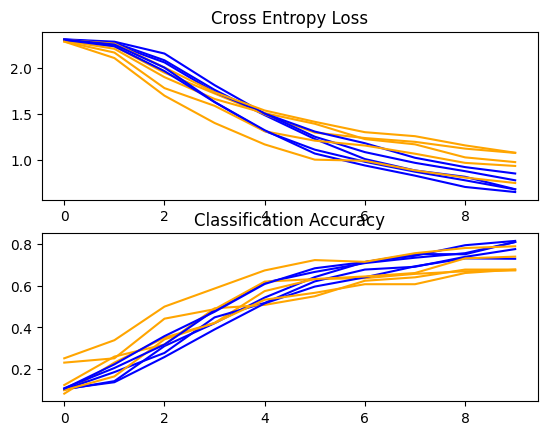

Accuracy: mean=71.157, n=5


In [ ]:
# load dataset
trainX, trainY, testX, testY = X_train_, y_train_, X_test_, y_test_
# evaluate model
scores, histories, model = train_model(trainX, trainY)

print("Orange: Validation, Blue: Train")
summarize_diagnostics(histories)
summarize_performance(scores)
# save model
# model.save('/content/drive/MyDrive/CS114/Handwritten_Digits_Recognizition/final_model.h5')

Không chuyển ảnh màu về ảnh gray scale

>>>Fold 1 : 64.463
>>>Fold 2 : 59.091
>>>Fold 3 : 76.033
>>>Fold 4 : 65.702
>>>Fold 5 : 73.967


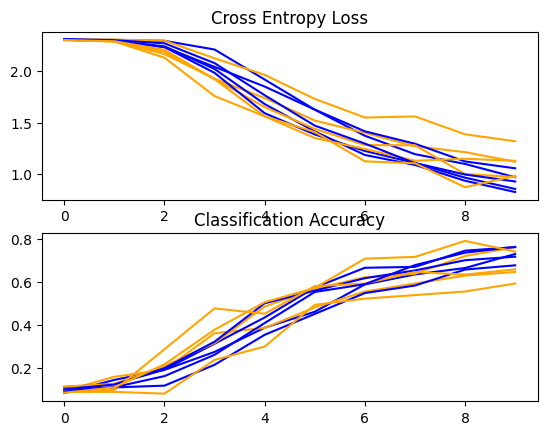

Accuracy: mean=67.851, n=5


In [42]:
# load dataset
trainX, trainY, testX, testY = X_train_, y_train_, X_test_, y_test_
# evaluate model
scores, histories, model = train_model(trainX, trainY)

summarize_diagnostics(histories)
summarize_performance(scores)
# save model
# model.save('/content/drive/MyDrive/CS114/Handwritten_Digits_Recognizition/final_model.h5')

# Predict && Evaluate

Có chuyển ảnh màu về ảnh gray scale

10/10 [==============================] - 0s 15ms/step
Accuracy: 0.7293729372937293
              precision    recall  f1-score   support

         0.0       0.60      0.91      0.72        23
         1.0       0.74      0.74      0.74        27
         2.0       0.68      0.66      0.67        32
         3.0       0.81      0.81      0.81        31
         4.0       0.81      0.63      0.71        35
         5.0       0.65      0.97      0.78        32
         6.0       0.88      0.73      0.80        30
         7.0       0.77      0.80      0.79        41
         8.0       0.89      0.47      0.62        34
         9.0       0.56      0.56      0.56        18

    accuracy                           0.73       303
   macro avg       0.74      0.73      0.72       303
weighted avg       0.75      0.73      0.73       303

Precision: 0.7377146161540384
Recall: 0.7278162433439759
F1: 0.7179328827354411
[[21  0  1  0  0  1  0  0  0  0]
 [ 1 20  1  0  1  0  0  4  0  0]
 [ 2  0 21  

Text(0.5, 0.98, 'Confusion Matrix')

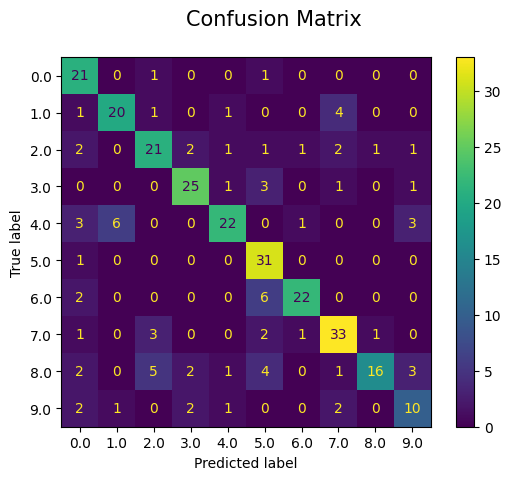

In [ ]:
y_ = []
y_true = []
y_predict = []
y_predict = model.predict(testX)
for i in y_predict:
  digit = np.argmax(i)
  y_.append(digit)
for i in y_test:
  y_true.append(i)
print(f"Accuracy: {accuracy_score(y_true,y_)}")
print(classification_report(y_true,y_))

print ("Precision:",precision_score(y_true,y_,average='macro'))
print ("Recall:",recall_score(y_true,y_,average='macro'))
print ("F1:",f1_score(y_true,y_,average='macro'))

disp = metrics.confusion_matrix(y_true, y_)
disp_2 = metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_)
print(disp)
disp_2.figure_.suptitle(f"Confusion Matrix",fontsize = 15)

Không chuyển ảnh màu về ảnh gray scale

10/10 [==============================] - 0s 10ms/step
Accuracy: 0.6567656765676567
              precision    recall  f1-score   support

         0.0       0.50      0.91      0.65        23
         1.0       0.50      0.78      0.61        27
         2.0       0.53      0.75      0.62        32
         3.0       0.88      0.68      0.76        31
         4.0       0.57      0.80      0.67        35
         5.0       0.96      0.72      0.82        32
         6.0       0.89      0.57      0.69        30
         7.0       1.00      0.39      0.56        41
         8.0       0.77      0.59      0.67        34
         9.0       0.50      0.44      0.47        18

    accuracy                           0.66       303
   macro avg       0.71      0.66      0.65       303
weighted avg       0.74      0.66      0.66       303

Precision: 0.710206284943127
Recall: 0.662658091854514
F1: 0.6522493685189107
[[21  1  0  0  0  0  0  0  1  0]
 [ 0 21  1  0  5  0  0  0  0  0]
 [ 2  2 24  0 

Text(0.5, 0.98, 'Confusion Matrix')

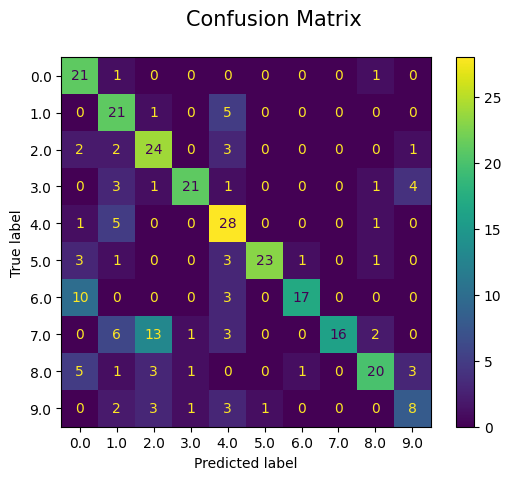

In [43]:
y_ = []
y_true = []
y_predict = []
y_predict = model.predict(testX)
for i in y_predict:
  digit = np.argmax(i)
  y_.append(digit)
for i in y_test:
  y_true.append(i)
print(f"Accuracy: {accuracy_score(y_true,y_)}")
print(classification_report(y_true,y_))

print ("Precision:",precision_score(y_true,y_,average='macro'))
print ("Recall:",recall_score(y_true,y_,average='macro'))
print ("F1:",f1_score(y_true,y_,average='macro'))

disp = metrics.confusion_matrix(y_true, y_)
disp_2 = metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_)
print(disp)
disp_2.figure_.suptitle(f"Confusion Matrix",fontsize = 15)

# References

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/